In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [100]:
df = pd.read_csv(r'C:\Users\swarn\Downloads\datasets(ML)/Train-Set.csv')
test_data =   pd.read_csv(r'C:\Users\swarn\Downloads\datasets(ML)/Test-Set.csv')

In [102]:
#Preprocessing the data

In [104]:
# inspecting the data

In [106]:
print(df.head())

  ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.270

In [108]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
            Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean  

In [110]:
#dropping irrelevant columns
#not considering ProductID, and OutletID

In [112]:
df.drop(['ProductID', 'OutletID'], axis=1, inplace=True)


In [114]:
#filling missing values

In [116]:
#for [WEIGHT]

In [118]:
print(df['Weight'].skew())


0.0824262091221237


In [120]:
#approoximately symmetric
#finding if there are any outliers

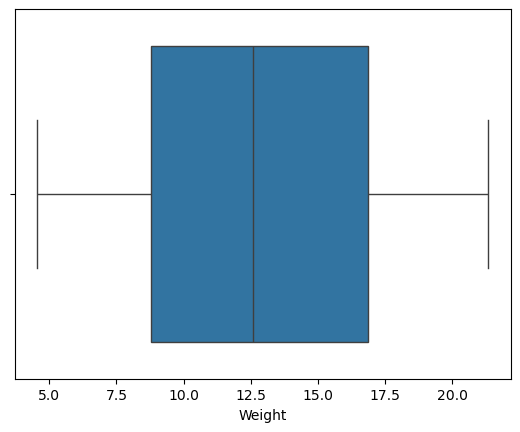

In [122]:
sns.boxplot(x=df['Weight'])
plt.show()

In [123]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())


In [125]:
#for [OutletSize]

In [128]:
#filling missing values in OuletSize based on the OutletType

In [130]:
mode_of_Outlet_size = df.pivot_table(values='OutletSize', columns='OutletType', aggfunc=lambda x: x.mode()[0])
print(mode_of_Outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [132]:
miss_values = df['OutletSize'].isnull()
df.loc[miss_values, 'OutletSize'] = df.loc[miss_values, 'OutletType'].apply(lambda x: mode_of_Outlet_size[x])

In [134]:
df.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [136]:
### no missing values

In [138]:
### CHECKING FOR UNIQUE VALUES IN CATEGORICAL COLUMNS

In [140]:
categorical_cols = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']

for col in categorical_cols:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-" * 40)


FatContent unique values:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------
ProductType unique values:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
OutletSize unique values:
['Medium' 'Small' 'High']
----------------------------------------
LocationType unique values:
['Tier 1' 'Tier 3' 'Tier 2']
----------------------------------------
OutletType unique values:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
----------------------------------------


In [142]:
df['FatContent'] = df['FatContent'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [144]:
print(df['FatContent'].unique())

['Low Fat' 'Regular']


In [146]:
### ONE HOT ENCODING

In [148]:
df = pd.get_dummies(df, columns=[
    'FatContent', 'ProductType', 'OutletSize',
    'LocationType', 'OutletType'
], drop_first=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   EstablishmentYear                  8523 non-null   int64  
 4   OutletSales                        8523 non-null   float64
 5   FatContent_Regular                 8523 non-null   bool   
 6   ProductType_Breads                 8523 non-null   bool   
 7   ProductType_Breakfast              8523 non-null   bool   
 8   ProductType_Canned                 8523 non-null   bool   
 9   ProductType_Dairy                  8523 non-null   bool   
 10  ProductType_Frozen Foods           8523 non-null   bool   
 11  ProductType_Fruits and Vegetables  8523 non-null   bool 

In [152]:
## adding Outlet_age and dropping Establishment Year

In [154]:
df['OutletAge'] = 2025 - df['EstablishmentYear']
df.drop('EstablishmentYear', axis=1, inplace=True)

In [156]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   OutletSales                        8523 non-null   float64
 4   FatContent_Regular                 8523 non-null   bool   
 5   ProductType_Breads                 8523 non-null   bool   
 6   ProductType_Breakfast              8523 non-null   bool   
 7   ProductType_Canned                 8523 non-null   bool   
 8   ProductType_Dairy                  8523 non-null   bool   
 9   ProductType_Frozen Foods           8523 non-null   bool   
 10  ProductType_Fruits and Vegetables  8523 non-null   bool   
 11  ProductType_Hard Drinks            8523 non-null   bool 

Weight                               0
ProductVisibility                    0
MRP                                  0
OutletSales                          0
FatContent_Regular                   0
ProductType_Breads                   0
ProductType_Breakfast                0
ProductType_Canned                   0
ProductType_Dairy                    0
ProductType_Frozen Foods             0
ProductType_Fruits and Vegetables    0
ProductType_Hard Drinks              0
ProductType_Health and Hygiene       0
ProductType_Household                0
ProductType_Meat                     0
ProductType_Others                   0
ProductType_Seafood                  0
ProductType_Snack Foods              0
ProductType_Soft Drinks              0
ProductType_Starchy Foods            0
OutletSize_Medium                    0
OutletSize_Small                     0
LocationType_Tier 2                  0
LocationType_Tier 3                  0
OutletType_Supermarket Type1         0
OutletType_Supermarket Ty

In [158]:
##futher feature engineering done , to get the better r2_score in the custom regressor
df['ProductVisibility'] = np.expm1(df['ProductVisibility'])

df['MRP_Visibility'] = df['MRP'] * df['ProductVisibility']
df['Weight_MRP'] = df['Weight'] * df['MRP']


In [160]:
### Splitting features

In [162]:
X = df.drop('OutletSales', axis=1)
y = df['OutletSales']

In [164]:
### Splitting the data to train and test

In [166]:
print(df.head())

   Weight  ProductVisibility       MRP  OutletSales  FatContent_Regular  \
0    9.30           0.016177  249.8092    3735.1380               False   
1    5.92           0.019465   48.2692     443.4228                True   
2   17.50           0.016901  141.6180    2097.2700               False   
3   19.20           0.000000  182.0950     732.3800                True   
4    8.93           0.000000   53.8614     994.7052               False   

   ProductType_Breads  ProductType_Breakfast  ProductType_Canned  \
0               False                  False               False   
1               False                  False               False   
2               False                  False               False   
3               False                  False               False   
4               False                  False               False   

   ProductType_Dairy  ProductType_Frozen Foods  ...  OutletSize_Medium  \
0               True                     False  ...               

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2529)

In [170]:
### Randomforest implementation

In [172]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm  # For optional progress bar

class BetterRandomForestRegressor:
    def __init__(self, n_estimators=1000, max_features='sqrt', max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.features_indices = []
        self.rng = np.random.RandomState(self.random_state)

    def fit(self, X, y):
        self.trees = []
        self.features_indices = []
        n_samples, n_features = X.shape

        # Decide number of features to select at each split
        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            max_features = self.max_features
        else:
            max_features = n_features  # Use all features

        for _ in tqdm(range(self.n_estimators), desc="Training Trees"):
            # Bootstrap sampling
            indices = self.rng.choice(n_samples, size=n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Random subset of features
            features = self.rng.choice(n_features, size=max_features, replace=False)
            self.features_indices.append(features)

            # Create a Decision Tree with a different random_state for each tree
            tree_random_state = self.rng.randint(0, 10000)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=tree_random_state)
            tree.fit(X_sample[:, features], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        preds = np.zeros((X.shape[0], self.n_estimators))
        
        for idx, tree in enumerate(self.trees):
            features = self.features_indices[idx]
            preds[:, idx] = tree.predict(X[:, features])

        # Average over all trees
        return np.mean(preds, axis=1)


In [174]:
rfr = BetterRandomForestRegressor(
    n_estimators=100, 
    max_features='sqrt', 
    max_depth=None,            # you can control tree depth!
    random_state=2529
)

rfr.fit(X_train.values, y_train.values)
y_pred = rfr.predict(X_test.values)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Custom Test R² Score(100 trees):", r2)
y_train_pred = rfr.predict(X_train.values)
r2_train = r2_score(y_train, y_train_pred)
print("Custom Train R² Score:", r2_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Training Trees: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.50it/s]


Custom Test R² Score(100 trees): 0.33677255446890275
Custom Train R² Score: 0.7340076620615932
RMSE: 1421.7503992973961


In [176]:
sample_indices = [0, 1, 2, 3, 4]  # Or any indices you're interested in
X_sample = X_train.values[sample_indices]
y_actual = y_train.values[sample_indices]
y_sample_pred = rfr.predict(X_sample)

# For each sample, print a compact representation
for i, idx in enumerate(sample_indices):
    features_str = ' '.join(map(str, X_sample[i]))
    print(f"Row {i}: Features = [{features_str}], Predicted = {y_sample_pred[i]:.2f}, Actual = {y_actual[i]:.2f}")

Row 0: Features = [16.2 0.016827121576795306 96.9726 True False False False False True False False False False False False False False False False False True True False True False False 23 1.6317697298179406 1570.9561199999998], Predicted = 1511.52, Actual = 1076.60
Row 1: Features = [17.1 0.039464126106121385 165.0842 False False False False False False False False False True False False False False False False False False False True True False False 38 6.5149036869281645 2822.9398200000005], Predicted = 2233.48, Actual = 2320.98
Row 2: Features = [13.85 0.05827172459394006 233.83 True False True False False False False False False False False False False False False False False True True False True False False 18 13.625677361801005 3238.5455], Predicted = 2566.66, Actual = 2796.36
Row 3: Features = [12.857645184135976 0.09572007403329731 121.373 False False False False False False False False True False False False False False False False False True False False False False False 40 1

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weight                             8523 non-null   float64
 1   ProductVisibility                  8523 non-null   float64
 2   MRP                                8523 non-null   float64
 3   OutletSales                        8523 non-null   float64
 4   FatContent_Regular                 8523 non-null   bool   
 5   ProductType_Breads                 8523 non-null   bool   
 6   ProductType_Breakfast              8523 non-null   bool   
 7   ProductType_Canned                 8523 non-null   bool   
 8   ProductType_Dairy                  8523 non-null   bool   
 9   ProductType_Frozen Foods           8523 non-null   bool   
 10  ProductType_Fruits and Vegetables  8523 non-null   bool   
 11  ProductType_Hard Drinks            8523 non-null   bool 

In [80]:
# 1. Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 2. Train sklearn RandomForestRegressor
rfr_sklearn = RandomForestRegressor(
    n_estimators=100,      # Same as your custom
    max_features='sqrt',   # Same as your custom
    max_depth=None,        
    random_state=2529
)

rfr_sklearn.fit(X_train, y_train)

# 3. Make predictions
y_pred_train = rfr_sklearn.predict(X_train)
y_pred_test = rfr_sklearn.predict(X_test)

# 4. Evaluate (R2 Score and RMSE)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# 5. Print results
print(f"Sklearn Test R² Score: {r2_test}")
print(f"Sklearn Test RMSE: {rmse_test}")


Sklearn Train R² Score: 0.9390334505745338
Sklearn Test R² Score: 0.6012087622883954
Sklearn Test RMSE: 1102.465271347717


In [163]:
#### all of the basic implementation that needs to be done, is here now, the major diff between scikit learn and the custom function
##### is because each split in scikit learn is done randomly,but in the custom fucntion
##### the features are randomized once per tree, so the randomness is in the custom regressor is not as much as in the scikit learn implementation

In [182]:
import numpy as np

# New feature vector
features = np.array([
    17.6, 0.07926063341324728, 110.9202, True, False, False, False, False, False, False, False, False, False,
    True, False, False, False, False, False, False, True, True, False, True, False, False, 23, 8.791605310324071, 1952.19552
]).reshape(1, -1)  # Reshape to (1, 29)

# Predict
predicted_value = rfr.predict(features)

# Print nicely
features_str = ' '.join(map(str, features.flatten()))
print(f"Features = [{features_str}], Predicted = {predicted_value[0]:.2f}")



Features = [17.6 0.07926063341324728 110.9202 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 23.0 8.791605310324071 1952.19552], Predicted = 1921.23
